In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dateparse = lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S%z")  # pd.datetime.strptime

# all_users = pd.read_csv('../data/all_users.csv')
# users_activities = pd.read_csv('../data/users_activity.csv')
# sample_tweets = pd.read_csv('../data/sample_tweets.csv')

users = pd.read_csv("../data/all_users.csv",
                    parse_dates=['created_at'],
                    converters={"user_id": str})
tweets = pd.read_csv("../data/sample_tweets.csv", #path/to/tweets_file
                     # nrows = 400000,
                     usecols=["tweet_id", "user_id", "created_at"],
                     parse_dates=['created_at'],
                     converters={"user_id": str,
                                 "tweet_id": str},
                     date_parser=dateparse,
                     lineterminator='\n')
activity = pd.read_csv("../data/users_activity.csv", #path/to/activity_file/
                       converters={"user_id": str})

core_users_ids = pd.read_csv("../data/core_users.csv",
                             converters={"user_id": str})


# Filtra il dataframe per includere solo le righe in cui l'user_id è presente nella lista dei core users
core_users = users[users["user_id"].isin(core_users_ids["user_id"])]


C:\Users\davis\AppData\Local\Temp\ipykernel_19300\4263444492.py:11: DtypeWarning: Columns (2,3,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv("../data/all_users.csv",


In [25]:
core_users.head()
# activity.head()
# tweets.head()

7010
7010


,user_id,created_at,user_screen_name,name,nbr_followers,nbr_followings,nbr_liked_tweets,nbr_lists,nbr_tweets,verified,protected,location,description,nbr_accounts,nbr_usernames
11102,841318992094605313,2017-03-13 16:04:13+00:00,dg080310,Donato G.🇮🇹#ICEUTNE#,210.0,486.0,49.0,0.0,3.0,False,False,NaN,Monza Lombardia 🏎 ...,1.0,2.0
22702,1218242063638188033,2020-01-17 18:42:36+00:00,Fidelio16852684,Fidelio,0.0,0.0,97.0,0.0,8.0,False,False,NaN,NaN,1.0,1.0
36236,1311952044144685056,2020-10-02 08:52:58+00:00,IlS0vran,ilS0vranIsta,36.0,35.0,1.0,1.0,17.0,False,False,NaN,NaN,1.0,1.0
43382,52021947,2009-06-29 10:46:16+00:00,marcobobabo,Marco D'Addabbo,10.0,167.0,368.0,0.0,24.0,False,False,"Milano, Lombardia",puglioemilianmilanestesista. il dottor house è...,1.0,1.0
64474,1298360422433730560,2020-08-25 20:43:52+00:00,Sararisso3,APOCALYPTO. IL SONNO DELLA RAGIONE GENERA MOSTRI.,46.0,25.0,0.0,0.0,52.0,False,False,NaN,"Raga, bro, con la 3° guerra mondiale possiamo ...",1.0,1.0


## Credibility

### Number of followers

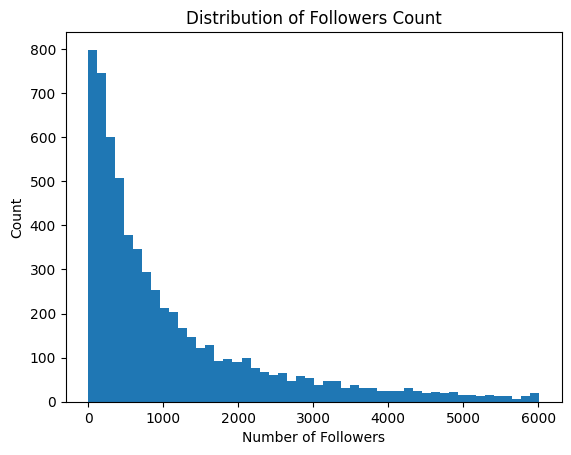

In [46]:
# core_users_copy = core_users.copy()
#core_users_copy['log_followers'] = np.log10(core_users_copy['nbr_followers'] + 1)

plt.hist(core_users['nbr_followers'], bins=50, range=(0, core_users['nbr_followers'].quantile(0.90)))
plt.xlabel('Number of Followers')
plt.ylabel('Count')
plt.title('Distribution of Followers Count')
plt.show()

### Number of followings

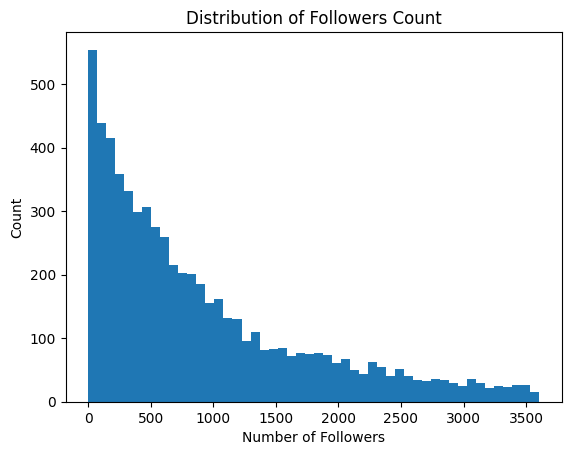

In [47]:
plt.hist(core_users['nbr_followings'], bins=50, range=(0, core_users['nbr_followings'].quantile(0.90)))
plt.xlabel('Number of Followers')
plt.ylabel('Count')
plt.title('Distribution of Followers Count')
plt.show()

### Favorites Ratio

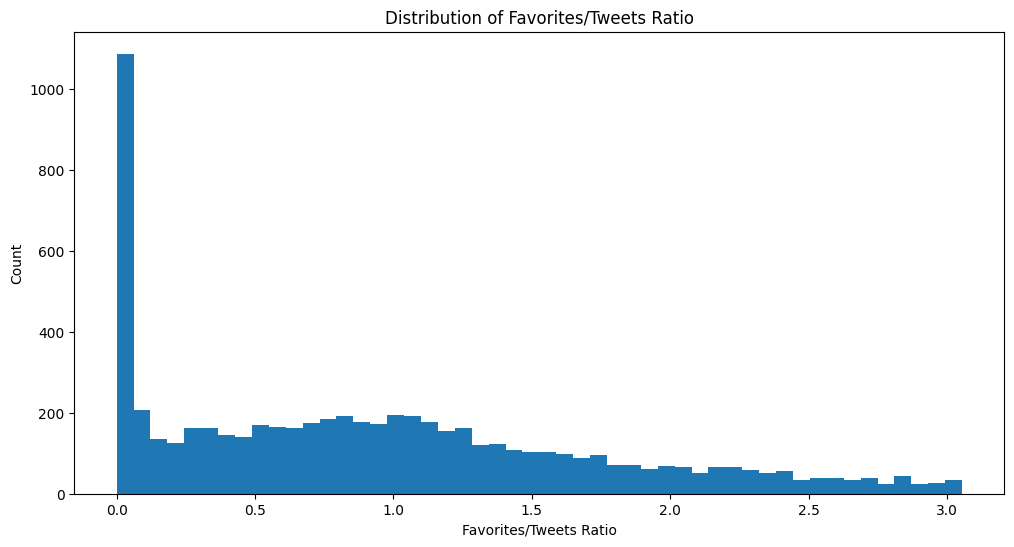

In [56]:
core_users_credibility = core_users.copy()

core_users_credibility['favorites_ratio'] = core_users_credibility['nbr_liked_tweets'] / core_users_credibility['nbr_tweets'].replace(0, np.nan)

plt.figure(figsize=(12, 6))

plt.hist(core_users_credibility['favorites_ratio'].dropna(), bins=50, range=(0, core_users_credibility['favorites_ratio'].quantile(0.90)))
plt.xlabel('Favorites/Tweets Ratio')
plt.ylabel('Count')
plt.title('Distribution of Favorites Ratio')
plt.show()

### Followers Ratio

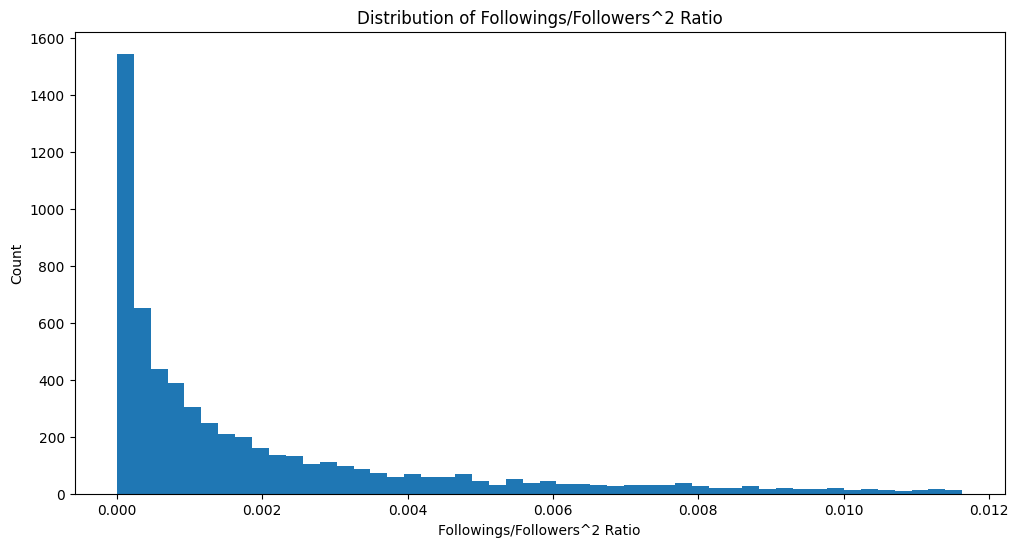

In [58]:
core_users_credibility = core_users.copy()

core_users_credibility['followers_ratio'] = core_users_credibility['nbr_followings'] / (core_users_credibility['nbr_followers']**2 + 1)

plt.figure(figsize=(12, 6))

plt.hist(core_users_credibility['followers_ratio'].dropna(), bins=50, range=(0, core_users_credibility['followers_ratio'].quantile(0.85)))
plt.xlabel('Followings/Followers^2 Ratio')
plt.ylabel('Count')
plt.title('Distribution of Followers Ratio')
plt.show()


### Following Ratio

In [ ]:
core_users_credibility = core_users.copy()

# core_users_credibility['age'] =
# core_users_credibility['following_ratio'] = core_users_credibility['nbr_followings'] / (core_users_credibility['age'])
#
# plt.figure(figsize=(12, 6))
#
# plt.hist(core_users_credibility['following_ratio'].dropna(), bins=50, range=(0, core_users_credibility['following_ratio'].quantile(0.85)))
# plt.xlabel('Followings/Age')
# plt.ylabel('Count')
# plt.title('Distribution of Following Ratio')
# plt.show()


### Tweet Ratio

In [ ]:
core_users_credibility = core_users.copy()

# core_users_credibility['age'] =
# core_users_credibility['tweet_ratio'] = core_users_credibility['nbr_tweets'] / (core_users_credibility['age'])
#
# plt.figure(figsize=(12, 6))
#
# plt.hist(core_users_credibility['tweet_ratio'].dropna(), bins=50, range=(0, core_users_credibility['tweet_ratio'].quantile(0.85)))
# plt.xlabel('Tweet/Age')
# plt.ylabel('Count')
# plt.title('Distribution of Tweet Ratio')
# plt.show()


## Initiative

### Retweet Ratio